In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
import funcs as func
import matplotlib.pyplot as plt
import sys
import pdb
import glob
import pickle
import dill

import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm

data_dir = "./Data/processed_data/Y_maze/data_with_animal_ids/"
data_target_dir = "./Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/"
figure_dir = "./Figures/Y_maze/"

plt.rcParams["figure.facecolor"] = "w"
import sys

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




In [2]:
files = glob.glob(data_target_dir+"block_change_aligned_df_*.csv")


In [3]:
files

['./Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_High_1_iSPN-Stim_2.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_High_10_dSPN-Control_6.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_Low_9_iSPN-Stim_16.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_Low_8_dSPN-Control_49.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_Low_1_iSPN-Stim_3.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_Low_8_dSPN-Control_50.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_df_High_Low_5_iSPN-Stim_10.csv',
 './Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/block_change_aligned_

In [4]:
block_change_aligned_df = pd.DataFrame()

In [5]:

for fn in files:
    temp = pd.read_csv(fn)
    block_change_aligned_df = block_change_aligned_df.append(temp)
block_change_aligned_df = block_change_aligned_df.reset_index(drop=True)
block_change_aligned_df.to_csv(data_target_dir+"block_change_aligned_df.csv")

<AxesSubplot:xlabel='trials_from_change_point', ylabel='ideal_B'>

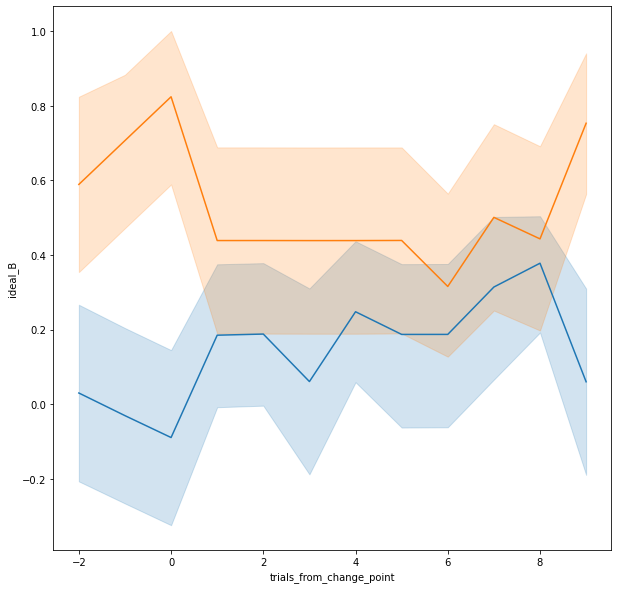

In [6]:
fig,ax = pl.subplots(1,1,figsize=(10,10))
sns.lineplot(x="trials_from_change_point",y="ideal_B",data=temp,ax=ax,palette='tab10')
sns.lineplot(x="trials_from_change_point",y="cpp",data=temp,ax=ax,palette='Set1')

In [7]:
block_change_aligned_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,r_t0,r_t1,cp,epoch_number,reward_p_t0,session,conflict,...,cpp,ideal_B,b_t0,b_t1,MC,RT(ms),block_change,trials_from_change_point,block_change_type,block_num_change
0,0,15.0,15.0,0.992056,0.000000,0.0,1.0,1.0,2.0,High,...,1.000000,0.500000,0.500000,0.000000,0.744679,NaN,0.0,-2.0,left->right,1->2
1,1,16.0,16.0,0.000000,0.998667,0.0,1.0,0.0,2.0,High,...,1.000000,-0.506604,1.006604,0.500000,0.500000,NaN,0.0,-1.0,left->right,1->2
2,2,17.0,17.0,0.984729,0.000000,1.0,2.0,1.0,2.0,High,...,1.000000,-0.515040,0.500000,1.015040,0.500000,NaN,1.0,0.0,left->right,1->2
3,3,18.0,18.0,0.000000,1.002307,0.0,2.0,0.0,2.0,High,...,1.000000,-0.513878,1.013878,0.500000,0.500000,NaN,0.0,1.0,left->right,1->2
4,4,19.0,19.0,0.000000,0.987058,0.0,2.0,0.0,2.0,High,...,0.011932,0.500000,0.000000,0.500000,0.500000,NaN,0.0,2.0,left->right,1->2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162496,190,406.0,406.0,0.000000,0.990478,0.0,17.0,0.0,32.0,High,...,0.001204,0.500000,0.000000,0.500000,0.749338,NaN,0.0,8.0,left->right,16->17
162497,191,407.0,407.0,0.000000,1.010617,0.0,17.0,0.0,32.0,High,...,1.000000,0.500000,0.000000,0.500000,0.799000,NaN,0.0,9.0,left->right,16->17
162498,192,423.0,423.0,0.000000,0.982719,0.0,17.0,0.0,32.0,High,...,1.000000,0.511610,0.500000,1.011610,0.500000,NaN,0.0,-2.0,right->left,17->18
162499,193,424.0,424.0,0.000000,0.983178,0.0,17.0,0.0,32.0,High,...,1.000000,0.500000,0.000000,0.500000,0.500000,NaN,0.0,-1.0,right->left,17->18
